Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

Convert the data to a Pandas dataframe

In [3]:
df = pd.DataFrame(data=adult, columns=['workclass', 'education-num', 'hours-per-week', 'income'])
df.head(n=5)

,workclass,education-num,hours-per-week,income
0,State-gov,13,40,small
1,Self-emp-not-inc,13,13,small
2,Private,9,40,small
3,Private,7,40,small
4,Private,13,40,small


Convert the categorical Data to numeric

In [4]:
def workclass_to_numeric(x):
    if x=='Federal-Gov':
        return 1
    if x=='Local-Gov':
        return 2
    if x=='Never-Worked':
        return 3
    if x=='Private':
        return 4
    if x=='Self-emp-inc':
        return 5
    if x=='Self-emp-not-inc':
        return 6
    if x=='State-gov':
        return 7
    if x=='Without-pay':
        return 8
    
def income_to_numeric(x):
    if x=='small':
        return 1
    if x=='large':
        return 2

Apply the functions and append them to the dataframe

In [5]:
df['workclass_num'] = df['workclass'].apply(workclass_to_numeric)
df['income_num'] = df['income'].apply(income_to_numeric)
df.head(n=5)

,workclass,education-num,hours-per-week,income,workclass_num,income_num
0,State-gov,13,40,small,7.0,1.0
1,Self-emp-not-inc,13,13,small,6.0,1.0
2,Private,9,40,small,4.0,1.0
3,Private,7,40,small,4.0,1.0
4,Private,13,40,small,4.0,1.0


Plot the Data to see the distributions

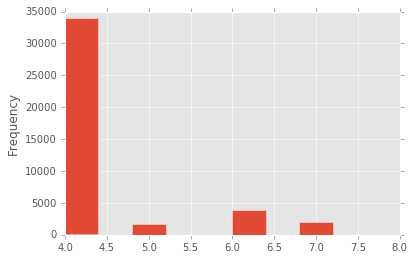

In [6]:
df['workclass_num'].plot(kind='hist',stacked=False);

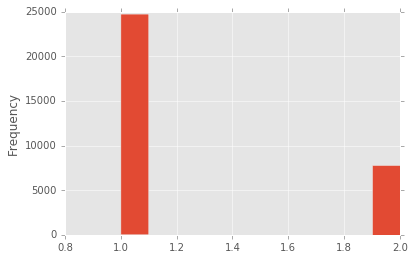

In [7]:
df['income_num'].plot(kind='hist',stacked=False);

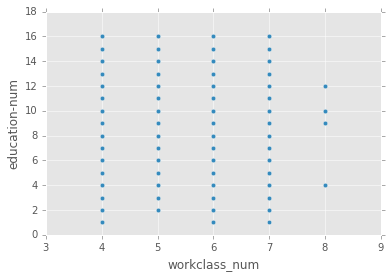

In [8]:
df.plot(kind='scatter',x='workclass_num',y='education-num')

Since the values are discrete - a scatterplot won't help us much here, however this can give us a clue as to our clusters 

Create a New Dataframe with just numerical data

In [9]:
df_new = pd.DataFrame(data=df, columns=['workclass_num', 'education-num', 'hours-per-week', 'income_num'])
df_new2 = pd.DataFrame(data=df, columns=['workclass_num', 'education-num'])
df_new.head(n=5)

,workclass_num,education-num,hours-per-week,income_num
0,7.0,13,40,1.0
1,6.0,13,13,1.0
2,4.0,9,40,1.0
3,4.0,7,40,1.0
4,4.0,13,40,1.0


Check for NaN and Infinite Numbers

In [10]:
np.any(np.isnan(df_new2))

True

Remove the NaN

In [11]:
dfn = df_new2.dropna()

In [12]:
np.any(np.isnan(dfn))

False

In [13]:
dn1 = dfn.as_matrix(columns=None)

Cluster the Data - We are going to use 5 clusters based off of the above scatterplot

In [14]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn1)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Get the labels and centroids

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Compute the Silhoutte Score

In [19]:
# NOTE: Computing the silhoutte score uses a lot of memory and can take a long time
# metrics.silhouette_score(dn1, labels, metric='euclidean')

In [ ]:
metrics.silhouette_score(dn1, labels, metric='euclidean', n_jobs=-1)